In [ ]:
import torch
import sys
sys.path.append('../implementation/')
from implementation.util.KPIDataset import KPIDataset
from implementation.util.KPIDiffDataset import KPIDiffDataset
import torch
import torch.nn as nn
import torch.nn.functional as f
from torch.utils.data import DataLoader
import pandas as pd
import matplotlib.pyplot as plt
from itertools import groupby
import numpy as np

%matplotlib inline

def print_progress_bar(iteration, total, prefix='', suffix='', decimals=1, length=100, fill='█'):
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print('\r%s |%s| %s%% %s' % (prefix, bar, percent, suffix), end='')
    # Print New Line on Complete
    if iteration == total:
        print()

In [2]:
class Model1(nn.Module):
    
    def __init__(self):
        super().__init__()
      
        self.fc1 = nn.Linear(777, 700)
        self.fc2 = nn.Linear(700, 600)
        self.fc3 = nn.Linear(600, 600)
        self.fc4 = nn.Linear(600, 2)
        
    def forward(self, x):
        x = f.relu(self.fc1(x))
        x = f.relu(self.fc2(x))
        x = f.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [12]:
class Model2(nn.Module):
    
    def __init__(self):
        super().__init__()
      
        self.fc1 = nn.Linear(1077, 700)
        self.fc2 = nn.Linear(700, 600)
        self.fc3 = nn.Linear(600, 600)
        self.fc4 = nn.Linear(600, 2)
        
    def forward(self, x):
        x = f.relu(self.fc1(x))
        x = f.relu(self.fc2(x))
        x = f.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [2]:
class Model3(nn.Module):
    
    def __init__(self):
        super().__init__()
        #1151
        
        self.pad1 = nn.ConstantPad1d(2, 0)
        self.conv1 = nn.Conv1d(2, 64, kernel_size=5, stride=1)
        self.pool1 = nn.MaxPool1d(2)
        
        self.pad2 = nn.ConstantPad1d(1, 0)
        self.conv2 = nn.Conv1d(64, 128, kernel_size=5, stride=1)
        self.pool2 = nn.MaxPool1d(2)
        
        self.fc1 = nn.Linear(36634, 1000)
        self.fc2 = nn.Linear(1000, 600)
        self.fc3 = nn.Linear(600, 2)
        
    def forward(self, x):
        kpi, x = x[:, :26], x[:, 26:]
        x = x.view((-1, 2, 1151))

        x = self.pad1(x)
        x = f.relu(self.conv1(x))
        x = self.pool1(x)
        
        x = self.pad2(x)
        x = f.relu(self.conv2(x))
        x = self.pool2(x)
        
        x = x.view((-1, 36634-26))
        x = torch.cat([kpi, x], dim=1)
        x = f.relu(self.fc1(x))
        x = f.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x

In [2]:
class Model4(nn.Module):
    
    def __init__(self):
        super().__init__()
        #1151
        
        self.pad1 = nn.ConstantPad1d(1, 0)
        self.conv1 = nn.Conv1d(1, 64, kernel_size=5, stride=1)
        self.pool1 = nn.MaxPool1d(2)
        
        self.pad2 = nn.ConstantPad1d(1, 0)
        self.conv2 = nn.Conv1d(64, 128, kernel_size=5, stride=1)
        self.pool2 = nn.MaxPool1d(2)
        
        self.fc1 = nn.Linear(36634, 600)
        self.fc2 = nn.Linear(600, 600)
        self.fc3 = nn.Linear(600, 2)
        
    def forward(self, x):
        kpi, x = x[:, :26], x[:, 26:].unsqueeze(1)

        x = self.pad1(x)
        x = f.relu(self.conv1(x))
        x = self.pool1(x)
        
        x = self.pad2(x)
        x = f.relu(self.conv2(x))
        x = self.pool2(x)
        
        x = x.view((-1, 36634-26))
        x = torch.cat([kpi, x], dim=1)
        x = f.relu(self.fc1(x))
        x = f.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x

In [2]:
class Model5(nn.Module):
    
    def __init__(self):
        super().__init__()
      
        self.fc1 = nn.Linear(1077, 700)
        self.fc2 = nn.Linear(700, 600)
        self.fc3 = nn.Linear(600, 600)
        self.fc4 = nn.Linear(600, 2)
        
    def forward(self, x):
        x = f.relu(self.fc1(x))
        x = f.relu(self.fc2(x))
        x = f.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [10]:
class Model6(nn.Module):

    def __init__(self, sequence_length=1651):
        super().__init__()
        #1651
        self.sequence_length = sequence_length
      
        self.pad1 = nn.ConstantPad1d(1, 0)
        self.conv1 = nn.Conv1d(2, 32, kernel_size=3, stride=1)
        self.pool1 = nn.MaxPool1d(2)
        
        self.pad2 = nn.ConstantPad1d(1, 0)
        self.conv2 = nn.Conv1d(32, 64, kernel_size=5, stride=1)
        self.pool2 = nn.MaxPool1d(2)
        
        self.pad3 = nn.ConstantPad1d(1, 0)
        self.conv3 = nn.Conv1d(64, 128, kernel_size=5, stride=1)
        self.pool3 = nn.MaxPool1d(2)
        
        self.fc1 = nn.Linear(128 * 204 + 26, 1200)
        self.fc2 = nn.Linear(1200, 800)
        self.fc3 = nn.Linear(800, 2)
        
    def forward(self, x):
        kpi, x = x[:, :26], x[:, 26:]
        x = x.view((-1, 2, self.sequence_length))

        x = self.pad1(x)
        x = f.relu(self.conv1(x))
        x = self.pool1(x)
        
        x = self.pad2(x)
        x = f.relu(self.conv2(x))
        x = self.pool2(x)
        
        x = self.pad3(x)
        x = f.relu(self.conv3(x))
        x = self.pool3(x)
        
        x = x.view((-1, 128 * 204))
        x = torch.cat([kpi, x], dim=1)
        x = f.relu(self.fc1(x))
        x = f.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x

In [2]:
class Model7(nn.Module):
    
    def __init__(self, sequence_length=1851):
        super().__init__()
        self.sequence_length = sequence_length
      
        self.pad1_1 = nn.ConstantPad1d(1, 0)
        self.pad1_2 = nn.ConstantPad1d(2, 0)
        self.pad1_3 = nn.ConstantPad1d(4, 0)
        self.conv1_1 = nn.Conv1d(2, 32, kernel_size=3, stride=1)
        self.conv1_2 = nn.Conv1d(2, 32, kernel_size=5, stride=1)
        self.conv1_3 = nn.Conv1d(2, 32, kernel_size=9, stride=1)
        self.pool1 = nn.MaxPool1d(2)
        
        self.pad2 = nn.ConstantPad1d(1, 0)
        self.conv2 = nn.Conv1d(96, 128, kernel_size=5, stride=1)
        self.pool2 = nn.MaxPool1d(2)
        
        self.pad3 = nn.ConstantPad1d(1, 0)
        self.conv3 = nn.Conv1d(128, 256, kernel_size=5, stride=1)
        self.pool3 = nn.MaxPool1d(2)
        
        self.fc1 = nn.Linear(256 * 229 + 26, 1600)
        self.fc2 = nn.Linear(1600, 1000)
        self.fc3 = nn.Linear(1000, 2)
        
    def forward(self, x):
        kpi, x = x[:, :26], x[:, 26:]
        x = x.view((-1, 2, self.sequence_length))

        x_1 = self.pad1_1(x)
        x_2 = self.pad1_2(x)
        x_3 = self.pad1_3(x)
        x_1 = f.relu(self.conv1_1(x_1))
        x_2 = f.relu(self.conv1_2(x_2))
        x_3 = f.relu(self.conv1_3(x_3))
        x = torch.cat([x_1, x_2, x_3], dim=1) # [N, 96, 1851]
        x = self.pool1(x)
        
        x = self.pad2(x)
        x = f.relu(self.conv2(x))
        x = self.pool2(x)
        
        x = self.pad3(x)
        x = f.relu(self.conv3(x))
        x = self.pool3(x)
        
        x = x.view((-1, 256 * 229))
        x = torch.cat([kpi, x], dim=1)
        x = f.relu(self.fc1(x))
        x = f.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x

In [13]:
class Model8(nn.Module):
    
    def __init__(self, sequence_length=2851):
        super().__init__()
        self.sequence_length = sequence_length
        
        ### Inception 1 ###
        self.pad1_2 = nn.ConstantPad1d(1, 0)
        self.pad1_3 = nn.ConstantPad1d(2, 0)
        
        self.conv1_1 = nn.Conv1d(2, 32, kernel_size=1, stride=1)
        self.conv1_2 = nn.Conv1d(2, 64, kernel_size=3, stride=1)
        self.conv1_3 = nn.Conv1d(2, 64, kernel_size=5, stride=1)
        
        self.pool1 = nn.MaxPool1d(3)
        
        ### Inception 2 ###
        self.pad2_4 = nn.ConstantPad1d(1, 0)
        
        self.conv2_1_1 = nn.Conv1d(160, 32, kernel_size=1, stride=1)
        self.conv2_1_2 = nn.Conv1d(160, 64, kernel_size=1, stride=1)
        self.conv2_1_3 = nn.Conv1d(160, 32, kernel_size=1, stride=1)
        self.pool2_1_4 = nn.MaxPool1d(3, stride=1)
        
        self.pad2_2 = nn.ConstantPad1d(1, 0)
        self.pad2_3 = nn.ConstantPad1d(2, 0)
        
        self.conv2_2_2 = nn.Conv1d(64, 128, kernel_size=3, stride=1)
        self.conv2_2_3 = nn.Conv1d(32, 64, kernel_size=5, stride=1)
        self.conv2_2_4 = nn.Conv1d(160, 32, kernel_size=1, stride=1)
        
        self.pool2 = nn.MaxPool1d(3)
        
        ### Inception 3 ###
        self.pad3_4 = nn.ConstantPad1d(1, 0)
        
        self.conv3_1_1 = nn.Conv1d(256, 32, kernel_size=1, stride=1)
        self.conv3_1_2 = nn.Conv1d(256, 64, kernel_size=1, stride=1)
        self.conv3_1_3 = nn.Conv1d(256, 32, kernel_size=1, stride=1)
        self.pool3_1_4 = nn.MaxPool1d(3, stride=1)
        
        self.pad3_2 = nn.ConstantPad1d(1, 0)
        self.pad3_3 = nn.ConstantPad1d(2, 0)
        
        self.conv3_2_2 = nn.Conv1d(64, 128, kernel_size=3, stride=1)
        self.conv3_2_3 = nn.Conv1d(32, 64, kernel_size=5, stride=1)
        self.conv3_2_4 = nn.Conv1d(256, 32, kernel_size=1, stride=1)
        
        self.pool3 = nn.MaxPool1d(3)
        
        ### Fully Connected ###
        self.fc1 = nn.Linear(256 * 105 + 26, 1600)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(1600, 1000)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(1000, 2)
        
    def forward(self, x):
        kpi, x = x[:, :26], x[:, 26:]
        x = x.view((-1, 2, self.sequence_length))

        ### Inception 1 ###
        x1 = self.conv1_1(x)
        x2 = self.conv1_2(self.pad1_2(x))
        x3 = self.conv1_3(self.pad1_3(x))
        
        x = torch.cat([x1, x2, x3], dim=1)
        x = f.relu(self.pool1(x))
        
        ### Inception 2 ###
        x1 = self.conv2_1_1(x)
        x2 = f.relu(self.conv2_1_2(x))
        x3 = f.relu(self.conv2_1_3(x))
        x4 = self.pool2_1_4(self.pad2_4(x))
        
        x2 = self.conv2_2_2(self.pad2_2(x2))
        x3 = self.conv2_2_3(self.pad2_3(x3))
        x4 = self.conv2_2_4(x4)

        x = f.relu(self.pool2(torch.cat([x1, x2, x3, x4], dim=1)))
        
        ### Inception 2 ###
        x1 = self.conv3_1_1(x)
        x2 = f.relu(self.conv3_1_2(x))
        x3 = f.relu(self.conv3_1_3(x))
        x4 = self.pool3_1_4(self.pad3_4(x))
        
        x2 = self.conv3_2_2(self.pad3_2(x2))
        x3 = self.conv3_2_3(self.pad3_3(x3))
        x4 = self.conv3_2_4(x4)

        x = f.relu(self.pool3(torch.cat([x1, x2, x3, x4], dim=1)))
        
        ### Fully Connected ###
        x = x.view((-1, 256 * 105))
        x = torch.cat([kpi, x], dim=1)
        x = self.fc1(x)
        x = f.relu(self.dropout1(x))
        x = self.fc2(x)
        x = f.relu(self.dropout2(x))
        x = self.fc3(x)
        
        return x

In [7]:
class Model9(nn.Module):
    
    def __init__(self, sequence_length=1851):
        super().__init__()
        self.sequence_length = sequence_length
      
        self.pad1_1 = nn.ConstantPad1d(1, 0)
        self.pad1_2 = nn.ConstantPad1d(2, 0)
        self.pad1_3 = nn.ConstantPad1d(4, 0)
        self.conv1_1 = nn.Conv1d(2, 32, kernel_size=3, stride=1)
        self.conv1_2 = nn.Conv1d(2, 32, kernel_size=5, stride=1)
        self.conv1_3 = nn.Conv1d(2, 32, kernel_size=9, stride=1)
        self.bn1 = nn.BatchNorm1d(96)
        self.pool1 = nn.MaxPool1d(2)
        
        self.pad2 = nn.ConstantPad1d(1, 0)
        self.conv2 = nn.Conv1d(96, 128, kernel_size=5, stride=1)
        self.bn2 = nn.BatchNorm1d(128)
        self.pool2 = nn.MaxPool1d(2)
        
        self.pad3 = nn.ConstantPad1d(1, 0)
        self.conv3 = nn.Conv1d(128, 256, kernel_size=5, stride=1)
        self.bn3 = nn.BatchNorm1d(256)
        self.pool3 = nn.MaxPool1d(2)
        
        self.fc1 = nn.Linear(256 * 229 + 26, 1600)
        self.fc2 = nn.Linear(1600, 1000)
        self.fc3 = nn.Linear(1000, 2)
        
    def forward(self, x):
        kpi, x = x[:, :26], x[:, 26:]
        x = x.view((-1, 2, self.sequence_length))

        x_1 = self.pad1_1(x)
        x_2 = self.pad1_2(x)
        x_3 = self.pad1_3(x)
        x_1 = f.relu(self.conv1_1(x_1))
        x_2 = f.relu(self.conv1_2(x_2))
        x_3 = f.relu(self.conv1_3(x_3))
        x = self.bn1(torch.cat([x_1, x_2, x_3], dim=1)) # [N, 96, 1851]
        x = self.pool1(x)
        
        x = self.pad2(x)
        x = self.bn2(f.relu(self.conv2(x)))
        x = self.pool2(x)
        
        x = self.pad3(x)
        x = self.bn3(f.relu(self.conv3(x)))
        x = self.pool3(x)
        
        x = x.view((-1, 256 * 229))
        x = torch.cat([kpi, x], dim=1)
        x = f.relu(self.fc1(x))
        x = f.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x

In [2]:
class Model10(nn.Module):
    
    def __init__(self, sequence_length=1551):
        super().__init__()
        self.sequence_length = sequence_length
      
        self.pad1 = nn.ConstantPad1d(1, 0)
        self.conv1 = nn.Conv1d(2, 64, kernel_size=5, stride=1)
        self.pool1 = nn.MaxPool1d(3)
        
        self.pad2 = nn.ConstantPad1d(1, 0)
        self.conv2 = nn.Conv1d(64, 128, kernel_size=5, stride=1)
        self.pool2 = nn.MaxPool1d(3)
        
        self.fc1 = nn.Linear(128 * 171 + 26, 1200)
        self.fc2 = nn.Linear(1200, 800)
        self.fc3 = nn.Linear(800, 2)
        
    def forward(self, x):
        kpi, x = x[:, :26], x[:, 26:]
        x = x.view((-1, 2, self.sequence_length))

        x = self.pad1(x)
        x = f.relu(self.conv1(x))
        x = self.pool1(x)
        
        x = self.pad2(x)
        x = f.relu(self.conv2(x))
        x = self.pool2(x)
        
        x = x.view((-1, 128 * 171))
        x = torch.cat([kpi, x], dim=1)
        x = f.relu(self.fc1(x))
        x = f.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x

In [2]:
class Model11(nn.Module):
    
    def __init__(self, sequence_length=1151):
        super().__init__()
        self.sequence_length = sequence_length
      
        self.pad1 = nn.ConstantPad1d(1, 0)
        self.conv1 = nn.Conv1d(2, 256, kernel_size=5, stride=1)
        self.pool1 = nn.MaxPool1d(4)
        
        self.fc1 = nn.Linear(256 * 287 + 26, 1400)
        self.fc2 = nn.Linear(1400, 800)
        self.fc3 = nn.Linear(800, 2)
        
    def forward(self, x):
        kpi, x = x[:, :26], x[:, 26:]
        x = x.view((-1, 2, self.sequence_length))

        x = self.pad1(x)
        x = f.relu(self.conv1(x))
        x = self.pool1(x)
        
        x = x.view((-1, 256 * 287))
        x = torch.cat([kpi, x], dim=1)
        x = f.relu(self.fc1(x))
        x = f.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x

In [34]:
class Model12(nn.Module):
    
    def __init__(self, sequence_length=1351):
        super().__init__()
        self.sequence_length = sequence_length
      
        self.pad1 = nn.ConstantPad1d(1, 0)
        self.conv1 = nn.Conv1d(2, 128, kernel_size=3, stride=1)
        self.pool1 = nn.MaxPool1d(4)
        
        self.pad2 = nn.ConstantPad1d(1, 0)
        self.conv2 = nn.Conv1d(128, 160, kernel_size=5, stride=1)
        self.pool2 = nn.MaxPool1d(4)
        
        self.fc1 = nn.Linear(160 * 83 + 26, 1600)
        self.dr1 = nn.Dropout(0.3)
        self.fc2 = nn.Linear(1600, 1200)
        self.dr2 = nn.Dropout(0.3)
        self.fc3 = nn.Linear(1200, 2)
        
    def forward(self, x):
        kpi, x = x[:, :26], x[:, 26:]
        x = x.view((-1, 2, self.sequence_length))

        x = self.pad1(x)
        x = f.relu(self.conv1(x))
        x = self.pool1(x)
        
        x = self.pad2(x)
        x = f.relu(self.conv2(x))
        x = self.pool2(x)
        
        x = x.view((-1, 160 * 83))
        x = torch.cat([kpi, x], dim=1)
        x = f.relu(self.dr1(self.fc1(x)))
        x = f.relu(self.dr2(self.fc2(x)))
        x = self.fc3(x)
        
        return x

In [2]:
class Model13(nn.Module):
    
    def __init__(self, sequence_length=1551):
        super().__init__()
        self.sequence_length = sequence_length
      
        self.pad1 = nn.ConstantPad1d(1, 0)
        self.conv1 = nn.Conv1d(2, 64, kernel_size=5, stride=1)
        self.pool1 = nn.MaxPool1d(3)
        
        self.pad2 = nn.ConstantPad1d(1, 0)
        self.conv2 = nn.Conv1d(64, 128, kernel_size=5, stride=1)
        self.pool2 = nn.MaxPool1d(3)
        
        self.fc1 = nn.Linear(128 * 171 + 26, 1200)
        self.fc2 = nn.Linear(1200, 800)
        self.fc3 = nn.Linear(800, 2)
        
    def forward(self, x):
        kpi, x = x[:, :26], x[:, 26:]
        x = x.view((-1, 2, self.sequence_length))

        x = self.pad1(x)
        x = f.relu(self.conv1(x))
        x = self.pool1(x)
        
        x = self.pad2(x)
        x = f.relu(self.conv2(x))
        x = self.pool2(x)
        
        x = x.view((-1, 128 * 171))
        x = torch.cat([kpi, x], dim=1)
        x = f.relu(self.fc1(x))
        x = f.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x

In [4]:
m = Model13()

In [5]:
s = torch.load('13_e23f0.986759.state')
m.load_state_dict(s)

In [6]:
s['fc1.weight'].shape

torch.Size([1200, 21914])

## single evaluation

In [7]:
dataset = KPIDiffDataset('../csv/test_2c.csv', seq_length=1551, step_width=1, evaluate=True)

model = m.cuda()

loader = DataLoader(dataset, 2048, False)
iter_per_epoch = len(loader)

result = []

with torch.no_grad():
    for i, x in enumerate(loader):
        x = x.cuda()
        out = model(x).data.cpu().numpy()
        result.extend(list(out.argmax(1)))
        print_progress_bar(i, iter_per_epoch)
        
df = pd.read_csv('../csv/test_2c.csv')
df = df[['KPI ID', 'timestamp', 'original', 'value']]

result_df = pd.DataFrame({'predict': result})

submission = df.join(result_df)

submission = submission[submission['original'] == True]
submission = submission[['KPI ID', 'timestamp', 'predict', 'value']]

 |███████████████████████████████████████████████████████████████████████████████████████████████████-| 99.9% 

In [8]:
submission[['KPI ID', 'timestamp', 'predict']].to_csv('13.csv')

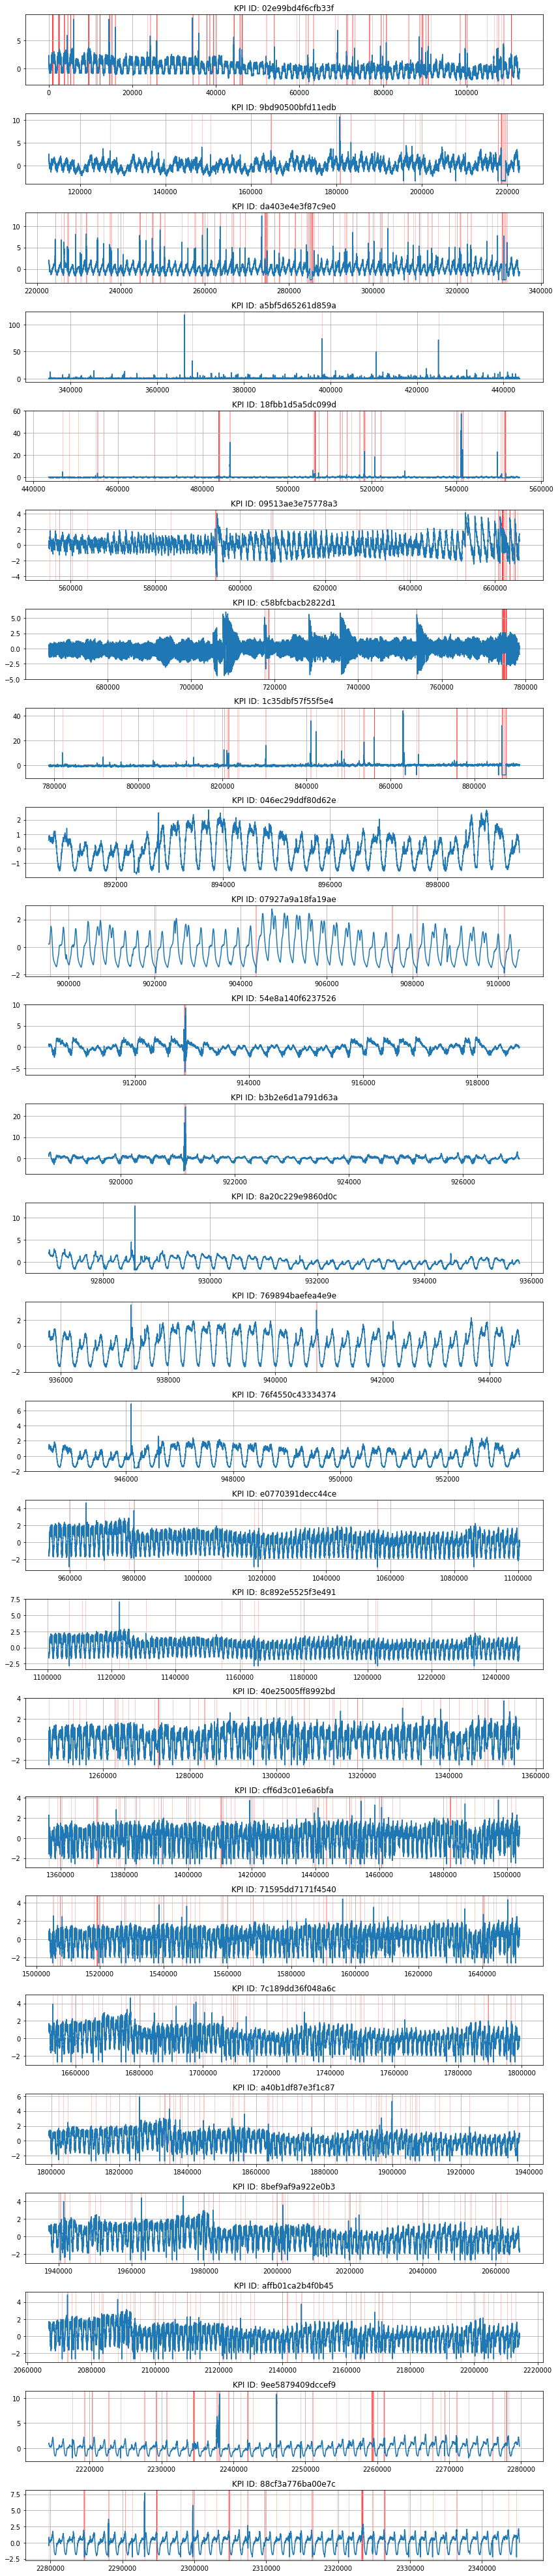

In [8]:
df = df_submit
ids = df['KPI ID'].unique()
fig, axes = plt.subplots(len(ids), 1, figsize=(12, 55))

for i, _id in enumerate(ids):
    ranges = []
    df_tmp = df[df['KPI ID'] == _id]
    ind = prev = 0
    for k, v in groupby(df_tmp['predict'], key=lambda x: x == 1):
        ind += sum(1 for _ in v)
        if k and prev + 1 != ind:
            ranges.append( (prev, ind -1 ) )
        prev = ind
        
    
    axes[i].plot(df_tmp.index, df_tmp['value'])

    for start, end in ranges:
        start = df_tmp.iloc[[start]].index[0]
        end = df_tmp.iloc[[end]].index[0]
        axes[i].axvspan(start, end, color='red', alpha=0.2)
        
    axes[i].set_title('KPI ID: ' + _id)
    axes[i].grid(True)

plt.tight_layout()
#plt.savefig('kpis.pdf')
plt.show()

## ensemble evaluation

In [14]:
files = ['1.csv', '2.csv', '3.csv', '4.csv', '5.csv', '6.csv', '7.csv', '8.csv', '10.csv', '12.csv', '13.csv', 'niklas/1.csv', 'niklas/2.csv'] # + 11, 8

dfs = []
for file in files:
    print(f'Reading {file}', end=' ')
    df = pd.read_csv(file)
    dfs.append(df)
    print(f'({len(df)} lines)')
    
df_sum = pd.DataFrame()
df_sum[0] = dfs[0]['predict']
for df in dfs[1:]:
    df_sum[0] = df_sum[0] + df['predict']
    
df_sum[0] = (df_sum[0] > len(files) / 2).astype(int)
df_submit = dfs[0][['KPI ID', 'timestamp']]
df_submit['predict'] = df_sum[0]

Reading 1.csv (2345211 lines)
Reading 2.csv (2345211 lines)
Reading 3.csv (2345211 lines)
Reading 4.csv (2345211 lines)
Reading 5.csv (2345211 lines)
Reading 6.csv (2345211 lines)
Reading 7.csv (2345211 lines)
Reading 8.csv (2345211 lines)
Reading 10.csv (2345211 lines)
Reading 12.csv (2345211 lines)
Reading 13.csv (2345211 lines)
Reading niklas/1.csv (2345211 lines)
Reading niklas/2.csv (2345211 lines)


/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [10]:
df_submit['value'] = dfs[0]['value']

/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [15]:
df_submit[['KPI ID', 'timestamp', 'predict']].to_csv('all.csv')